In [1]:
library(dplyr)
library(ggplot2)
library(reshape2)
library(stringr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.4.4"
Attaching package: 'ggplot2'

The following object is masked from 'package:dplyr':

    vars

Warning message:
"package 'reshape2' was built under R version 3.4.4"

In [2]:
range = read.csv("Systems 92-12.csv")

In [3]:
head(range)
tail(range)

LIBID,LIBNAME,PHONE,POPU,CENTLIB,BRANLIB,BKMOB,MASTER,LIBRARIA,OTHPAID,...,VIDEO_PH,VIDEO_DL,MAT_TYPE,CBSA,MICROF,DB_LO_OT,GAL,GALMS,POSTMS,Location
40,ANCHOR POINT PUBLIC LIBRARY,9072357345,1358,1,0,0,0.00,0.25,0.00,...,NA,NA,NA,NA,,NA,,,,
50,ANCHORAGE MUNICIPAL LIBRARIES,9072612975,272262,1,4,0,34.62,34.62,73.58,...,NA,NA,NA,NA,,NA,,,,
60,ANDERSON VILLAGE LIBRARY,9075822628,649,1,0,0,0.00,0.25,0.00,...,NA,NA,NA,NA,,NA,,,,
70,ANIAK PUBLIC LIBRARY,9076754435,529,1,0,0,0.00,0.75,0.00,...,NA,NA,NA,NA,,NA,,,,
90,KUSKOKWIM CONSORTIUM LIBRARY,9075434516,4868,1,0,0,0.75,0.75,2.00,...,NA,NA,NA,NA,,NA,,,,
100,BIG LAKE LIBRARY,9078926475,3818,1,0,0,0.00,1.00,0.25,...,NA,NA,NA,NA,,NA,,,,


,LIBID,LIBNAME,PHONE,POPU,CENTLIB,BRANLIB,BKMOB,MASTER,LIBRARIA,OTHPAID,...,VIDEO_PH,VIDEO_DL,MAT_TYPE,CBSA,MICROF,DB_LO_OT,GAL,GALMS,POSTMS,Location
191614,26,NIOBRARA COUNTY LIBRARY,3073343490,NA,1,0,0,0.00,4.25,0.00,...,5608,0,NA,0,0,1,house,STD,NND,"425 S MAIN ST LUSK, WY 82225 (42.760902000000002, -104.45207499999999)"
191615,29,SUBLETTE COUNTY LIBRARY,3073674114,NA,1,1,0,2.00,2.00,13.00,...,6094,0,NA,0,0,1,house,ADV,NND,"155 S TYLER ST PINEDALE, WY 82941 (42.865096999999999, -109.86128100000001)"
191616,30,TETON COUNTY LIBRARY,3077332164,NA,1,1,0,3.85,6.50,30.15,...,7026,0,NA,27220,1,15,addresspoint,STD,NND,"125 VIRGINIAN LANE JACKSON, WY 83001 (43.471780000000003, -110.779203)"
191617,31,UINTA COUNTY LIBRARIES,3077892770,NA,1,2,0,3.00,3.00,10.00,...,9525,0,NA,21740,1,3,addresspoint,STD,NND,"701 MAIN ST EVANSTON, WY 82930 (41.265974999999997, -110.96340499999999)"
191618,32,WASHAKIE COUNTY LIBRARY,3073472231,NA,1,1,0,0.00,2.00,3.50,...,2573,0,NA,0,0,0,house,STD,NND,"1019 COBURN AVE WORLAND, WY 82401 (44.015771000000001, -107.955461)"
191619,33,WESTON COUNTY LIBRARY SYSTEM,3077462206,NA,1,1,0,0.00,4.00,2.58,...,2973,0,NA,0,0,5,house,STD,NND,"23 WEST MAIN ST NEWCASTLE, WY 82701 (43.855671000000001, -104.202302)"


In [4]:
smallrange = range %>%
select("TOTINCM", "PLSYEAR", "STABR")
head(smallrange)

TOTINCM,PLSYEAR,STABR
9203,1992,AK
7374190,1992,AK
14887,1992,AK
17631,1992,AK
263549,1992,AK
94262,1992,AK


In [ ]:
smallrange %>%
mutate (
group_by(PLSYEAR),
summarize(totals = sum(TOTINCM)))


Warning message:
"package 'bindrcpp' was built under R version 3.4.4"

Warning message:
"Removed 2 rows containing non-finite values (stat_count)."

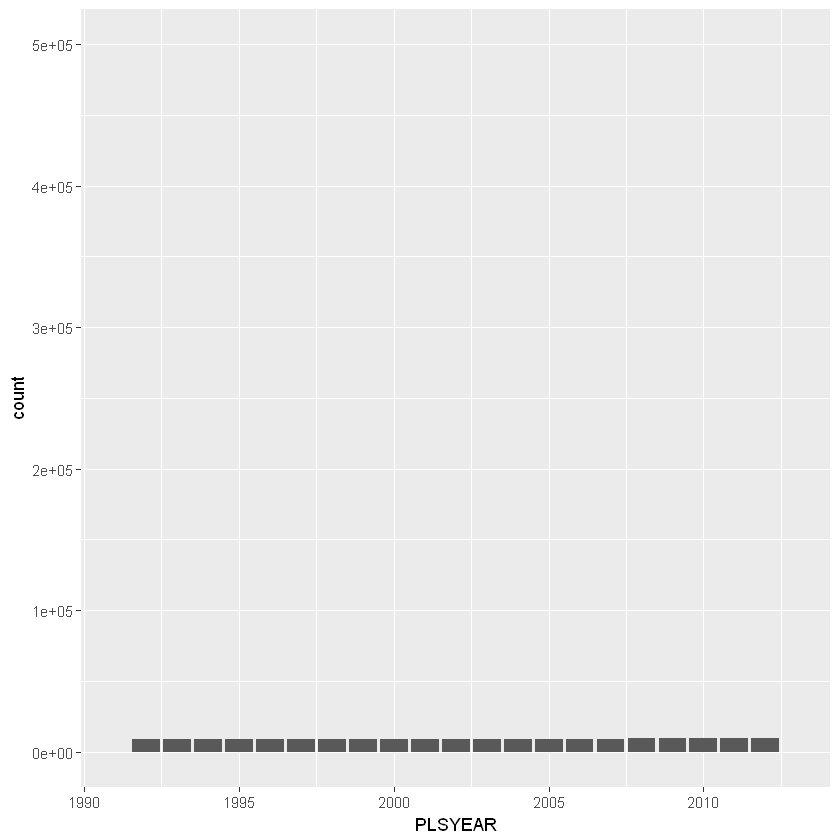

In [8]:
ggplot(smallrange, aes(x=PLSYEAR)) + geom_bar() + scale_y_continuous(limits = c(0, 500000)) + 
scale_x_continuous(limits = c(1991, 2013))

In [8]:
recent = read.csv("States 2015.csv")

In [10]:
head(recent)
tail(recent)

STATE,SERVICE.AREA.POPULATION,UNDUPLICATED.POPULATION,STATE.POPULATION,CENTRAL.LIBRARIES,BRANCH.LIBRARIES,BOOKMOBILES,MLS.LIBRARIAN.STAFF,LIBRARIAN.STAFF,OTHER.STAFF,...,PROGRAM.AUDIENCE,KIDS.PROGRAM.AUDIENCE,YA.PROGRAM.AUDIENCE,COMPUTERS,COMPUTER.USES,WIFI.SESSIONS,START.DATE,END.DATE,YEAR,BEA.REGION
AK,654479,647583,737625,86,16,1,58.86,118.31,193.09,...,254172,177102,21401,1069,749206,730747,14-Jan,15-Jun,2016,8
AL,4833722,4833722,4833722,222,74,16,328.08,730.76,988.72,...,1121601,723637,93665,5556,4277108,3703127,14-Oct,15-Sep,2016,5
AR,2833849,2643928,2915918,54,179,2,145.11,282.61,723.28,...,1050483,738691,103945,2718,1858903,1150709,15-Jan,15-Dec,2016,5
AS,60863,60324,60863,1,1,0,1.00,7.00,3.00,...,6846,6684,12,20,7118,2420,14-Oct,15-Sep,2016,9
AZ,10652448,6758251,6758251,85,136,11,473.98,560.61,1492.25,...,1526227,1064657,100069,7630,7150328,5340816,14-Jul,15-Jun,2016,6
CA,38697702,38697702,38714725,166,949,51,3080.26,3268.83,8510.39,...,9428715,7051832,553731,22251,32275277,15496024,14-Jul,15-Jun,2016,8


,STATE,SERVICE.AREA.POPULATION,UNDUPLICATED.POPULATION,STATE.POPULATION,CENTRAL.LIBRARIES,BRANCH.LIBRARIES,BOOKMOBILES,MLS.LIBRARIAN.STAFF,LIBRARIAN.STAFF,OTHER.STAFF,...,PROGRAM.AUDIENCE,KIDS.PROGRAM.AUDIENCE,YA.PROGRAM.AUDIENCE,COMPUTERS,COMPUTER.USES,WIFI.SESSIONS,START.DATE,END.DATE,YEAR,BEA.REGION
48,VA,8164556,8164556,8382993,83,274,22,897.74,996.93,2747.43,...,2562861,1727384,139964,7084,6963547,7398797,14-Jul,15-Jun,2016,5
49,VT,686918,605296,626630,183,3,4,67.21,217.73,137.92,...,399967,269004,18650,1110,630669,614020,14-Jan,15-Dec,2016,1
50,WA,6955368,6955368,7061410,54,291,26,798.19,838.51,3044.60,...,2327178,1677860,213366,6374,8951109,13992213,15-Jan,15-Dec,2016,8
51,WI,5749006,5749006,5753324,378,82,5,711.86,1148.11,1903.64,...,2355286,1769739,131941,6327,5467325,4068806,15-Jan,15-Dec,2016,3
52,WV,1852994,1852994,1852994,97,76,8,95.08,366.49,296.53,...,456933,339141,35151,1469,1009608,110036,14-Jul,15-Jun,2016,5
53,WY,584153,584153,584153,23,52,2,61.66,172.34,284.14,...,403130,307797,34067,881,851981,172514,14-Jul,15-Jun,2016,7


In [11]:
longrecent = melt(recent)
head(longrecent)

Using STATE, LOCAL.REVENUE, STATE.REVENUE, FEDERAL.REVENUE, OTHER.REVENUE, TOTAL.REVENUE, SALARIES, BENEFITS, TOTAL.STAFF.EXPENDITURES, PRINT.EXPENDITURES, ELECTRONIC.EXPENDITURES, OTHER.COLLECTION.EXPENDITURES, TOTAL.COLLECTION.EXPENDITURES, OTHER.EXPENDITURES, TOTAL.EXPENDITURES, LOCAL.CAPITAL.REVENUE, STATE.CAPITAL.REVENUE, FEDERAL.CAPITAL.REVENUE, OTHER.CAPITAL.REVENUE, TOTAL.CAPITAL.REVENUE, CAPITAL.EXPENDITURES, START.DATE, END.DATE as id variables


STATE,LOCAL.REVENUE,STATE.REVENUE,FEDERAL.REVENUE,OTHER.REVENUE,TOTAL.REVENUE,SALARIES,BENEFITS,TOTAL.STAFF.EXPENDITURES,PRINT.EXPENDITURES,...,LOCAL.CAPITAL.REVENUE,STATE.CAPITAL.REVENUE,FEDERAL.CAPITAL.REVENUE,OTHER.CAPITAL.REVENUE,TOTAL.CAPITAL.REVENUE,CAPITAL.EXPENDITURES,START.DATE,END.DATE,variable,value
AK,$32645536.00,$1096129.00,$954653.00,$1288407.00,$35984725.00,$14326886.00,$9750253.00,$24077139.00,$1857977.00,...,$560252.00,$5631270.00,$2375937.00,$683610.00,$9251069.00,$29314961.00,14-Jan,15-Jun,SERVICE.AREA.POPULATION,654479
AL,$89633662.00,$3832508.00,$955225.00,$10057802.00,$104479197.00,$55101208.00,$14819063.00,$69920271.00,$6225330.00,...,$6152118.00,$0.00,$432168.00,$139973.00,$6724259.00,$2526421.00,14-Oct,15-Sep,SERVICE.AREA.POPULATION,4833722
AR,$65801870.00,$5207194.00,$1560.00,$3989079.00,$74999703.00,$34300378.00,$10656365.00,$44956743.00,$5390795.00,...,$7575103.00,$258941.00,$33000.00,$307262.00,$8174306.00,$6495203.00,15-Jan,15-Dec,SERVICE.AREA.POPULATION,2833849
AS,$0.00,$314583.00,$136365.00,$15577.00,$466525.00,$210333.00,$20909.00,$231242.00,$17224.00,...,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,14-Oct,15-Sep,SERVICE.AREA.POPULATION,60863
AZ,$168773387.00,$1673773.00,$1972972.00,$7566565.00,$179986697.00,$77714692.00,$28918074.00,$106632766.00,$15183607.00,...,$7388945.00,$0.00,$199905.00,$151400.00,$7740250.00,$6491489.00,14-Jul,15-Jun,SERVICE.AREA.POPULATION,10652448
CA,$1332476430.00,$12946522.00,$4947740.00,$67063059.00,$1417433751.00,$579004338.00,$294834779.00,$873839117.00,$72737141.00,...,$69958065.00,$3094289.00,$361799.00,$7376383.00,$80790536.00,$113838920.00,14-Jul,15-Jun,SERVICE.AREA.POPULATION,38697702


For the first one, I want to do number of visits and users in each state with the State 2015 dataset. Then I think I want to do

In [12]:
totals = recent %>%
select("STATE", "VISITS", "SERVICE.AREA.POPULATION", "USERS")
group_by(STATE) %>%
summarize(total = sum(VISITS))

head(totals)

ERROR: Error in group_by(STATE): object 'STATE' not found


ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'total' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16. print.ggplot(obj)
17. ggplot_build(x)
18. ggplot_build.ggplot(x)
19. by_lay

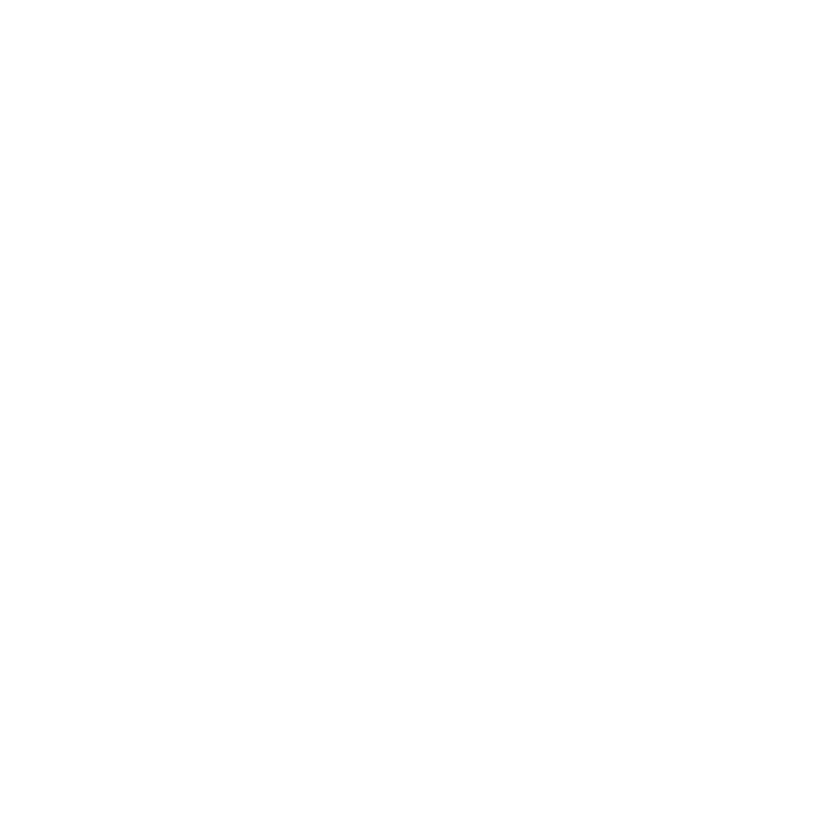

In [5]:
ggplot(totals, aes(x = STATE, weight = SERVICE.AREA.POPULATION, fill= total)) + geom_bar()